# Data Preprocessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy.stats.mstats import winsorize
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

## 📁Load Dataset

In [2]:
file_path = '../dataset/'

app_train_df = pd.read_csv(file_path + 'application_train.csv')
app_test_df = pd.read_csv(file_path + 'application_test.csv')

## 🔍Feature Selection from EDA

In [66]:
features = app_train_df.columns.tolist()

low_var_features = ['REGION_POPULATION_RELATIVE', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'COMMONAREA_AVG', 'LANDAREA_AVG', 
                    'LIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 
                    'COMMONAREA_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 
                    'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'COMMONAREA_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 
                    'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI'
                    ]

high_corr_features = ['AMT_GOOD_PRICE', 'AMT_CREDIT', 'ELEVATOR_MODE', 'ELEVATOR_AVG', 'ELEVATOR_MODE', 'LIVINGAREA_MODE', 
                        'LIVINGAREA_MEDI', 'TOTALAREA_MODE', 'YEARS_BUILD_MODE', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI',
                        'NONLIVINGAPARTMENTS_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'NONLIVINGAPARTMENTS_MODE',
                        'NONLIVINGAPARTMENTS_MEDI', 'APARTMENTS_AVG',
                        'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'ELEVATORS_AVG',
                        'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LIVINGAPARTMENTS_AVG',
                        'LIVINGAREA_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
                        'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
                        'LIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_MODE', 'APARTMENTS_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
                        'YEARS_BUILD_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMIN_MEDI',
                        'LIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'FONDKAPREMONT_MODE',
                        'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
                        'DAYS_LAST_PHONE_CHANGE', 'REGION_RATING_CLIENT', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
                        'REG_REGION_NOT_WORK_REGION', 'BASEMENTAREA_MEDI', 'YEARS_BUILD_MEDI', 'ELEVATORS_MEDI',
                        'FLOORSMAX_MEDI', 'LANDAREA_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAREA_MEDI',
                        'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'BASEMENTAREA_AVG', 'YEARS_BUILD_AVG', 'ELEVATORS_AVG',
                        'FLOORSMAX_AVG', 'LANDAREA_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAREA_AVG',
                        'BASEMENTAREA_MODE', 'YEARS_BUILD_MODE', 'ELEVATORS_MODE', 'FLOORSMAX_MODE', 'LANDAREA_MODE', 'YEARS_BUILD_AVG',
                        'FLOORSMAX_AVG', 'LIVINGAREA_AVG', 'BASEMENTAREA_MODE', 'ELEVATORS_MODE',
                        'LANDAREA_MODE', 'NONLIVINGAREA_MODE', 'YEARS_BUILD_MEDI', 'FLOORSMAX_MEDI', 'LIVINGAREA_MEDI',
                        'HOUSETYPE_MODE',
                    ]

period_features = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
                    'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'DAYS_REGISTRATION'
                    ]

high_cardinality_features = ['FLAG_MOBIL', 'FLAG_CONT_MOBILE', 'FLAG_EMAIL', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 
                            'LIVE_REGION_NOT_WORK_REGION', 'REGION_CITY_NOT_LIVE_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_2' 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_7', 
                            'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 
                            'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 
                            'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 
                            'AMT_REQ_CREDIT_BUREAU_YEAR', 'HOUSETYPE_MODE', 'EMERGENCYSTATE_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
                            'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_INCOME_TOTAL', 'NAME_HOUSING_TYPE', 'ORGANIZATION_TYPE'
                            ]

useless_features = ['NAME_TYPE_SUITE', 'DAYS_BIRTH', 'DAYS_REGISTRATION', 'REGION_RATING_CLIENT_W_CITY', 'AMT_REQ_CREDIT_BUREAU_HOUR',
                    'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_QRT']

In [4]:
selected_num_features = ['CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'EXT_SOURCE_2', 'EXT_SOURCE_3']
selected_cat_features = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 
                        'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 
                        'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 
                        'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_6']

all_selected_features = selected_cat_features + selected_num_features

print(f'Number of selected numerical features: {len(selected_num_features)}\n')
print(f'Number of selected categorical features: {len(selected_cat_features)}')

Number of selected numerical features: 6

Number of selected categorical features: 17


In [5]:
app_train_df[all_selected_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   NAME_CONTRACT_TYPE       307511 non-null  object 
 1   CODE_GENDER              307511 non-null  object 
 2   FLAG_OWN_CAR             307511 non-null  object 
 3   FLAG_OWN_REALTY          307511 non-null  object 
 4   NAME_INCOME_TYPE         307511 non-null  object 
 5   NAME_EDUCATION_TYPE      307511 non-null  object 
 6   NAME_FAMILY_STATUS       307511 non-null  object 
 7   NAME_HOUSING_TYPE        307511 non-null  object 
 8   FLAG_EMP_PHONE           307511 non-null  int64  
 9   FLAG_WORK_PHONE          307511 non-null  int64  
 10  FLAG_PHONE               307511 non-null  int64  
 11  REG_CITY_NOT_LIVE_CITY   307511 non-null  int64  
 12  REG_CITY_NOT_WORK_CITY   307511 non-null  int64  
 13  LIVE_CITY_NOT_WORK_CITY  307511 non-null  int64  
 14  ORGA

In [6]:
#app_train_df['CNT_FAM_MEMBERS'] = app_train_df['CNT_FAM_MEMBERS'].astype('int64')
app_train_df['CNT_FAM_MEMBERS'] = pd.to_numeric(app_train_df['CNT_FAM_MEMBERS'], errors='coerce')

## 🔍Missing values analysis

### Detect missing values

In [7]:
missing_summary = pd.DataFrame({
    'Feature': all_selected_features,
    'Missing Count': app_train_df[all_selected_features].isna().sum(),
    'Missing Percentage (%)': (app_train_df[all_selected_features].isna().sum() / len(app_train_df)) * 100
})

# Filter only features with missing values
missing_summary = missing_summary[missing_summary['Missing Count'] > 0]

# Sort by Missing Count in descending order
missing_summary = missing_summary.sort_values(by='Missing Count', ascending=False).reset_index(drop=True)

# Display the summary table
missing_summary


,Feature,Missing Count,Missing Percentage (%)
0,EXT_SOURCE_3,60965,19.825307
1,EXT_SOURCE_2,660,0.214626
2,AMT_GOODS_PRICE,278,0.090403
3,AMT_ANNUITY,12,0.003902
4,CNT_FAM_MEMBERS,2,0.000650


### Drop features with more than 18% missing values

In [8]:
# Filter out features with missing percentage > 18%
high_missing_features = missing_summary[missing_summary['Missing Percentage (%)'] > 18]['Feature'].tolist()

# Remove these features from the 'features' list
all_selected_features = [feature for feature in all_selected_features if feature not in high_missing_features]

# Display the updated features list
print(f"Number of remaining features: {len(all_selected_features)}")
print("Removed Features (More than 18% missing):", high_missing_features)

Number of remaining features: 22
Removed Features (More than 18% missing): ['EXT_SOURCE_3']


In [9]:
selected_num_features.remove('EXT_SOURCE_3')

### Fill features with missing values <= 18% with the median

In [10]:
# Identify features with missing percentage <= 18%
low_missing_features = missing_summary[missing_summary['Missing Percentage (%)'] <= 18]['Feature'].tolist()

# Fill missing values with median for these features
for feature in low_missing_features:
    median_value = app_train_df[feature].median()
    app_train_df[feature].fillna(median_value, inplace=True)

print("Filled missing values (<= 18%) with median for selected features.")

Filled missing values (<= 18%) with median for selected features.


In [11]:
new_train_app_df = app_train_df[all_selected_features + ['TARGET']]
new_test_app_df = app_test_df[all_selected_features]

## ✂️Drop duplicates

### Detect Duplicates

In [12]:
# Detect duplicate rows based on the 'features' list
duplicate_rows = new_train_app_df.duplicated(keep='first')

# Count the number of duplicates
num_duplicates = duplicate_rows.sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 9


### Drop duplicates

In [13]:
# Remove duplicates
new_train_app_df = new_train_app_df.drop_duplicates(keep='first')

# Detect duplicate rows based on the 'features' list
duplicate_rows = new_train_app_df.duplicated(keep='first')

# Count the number of duplicates
num_duplicates = duplicate_rows.sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


## 📉Outliers Handling

### Plot Numerical Features Distribution

c:\Users\fizuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fizuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fizuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fizuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

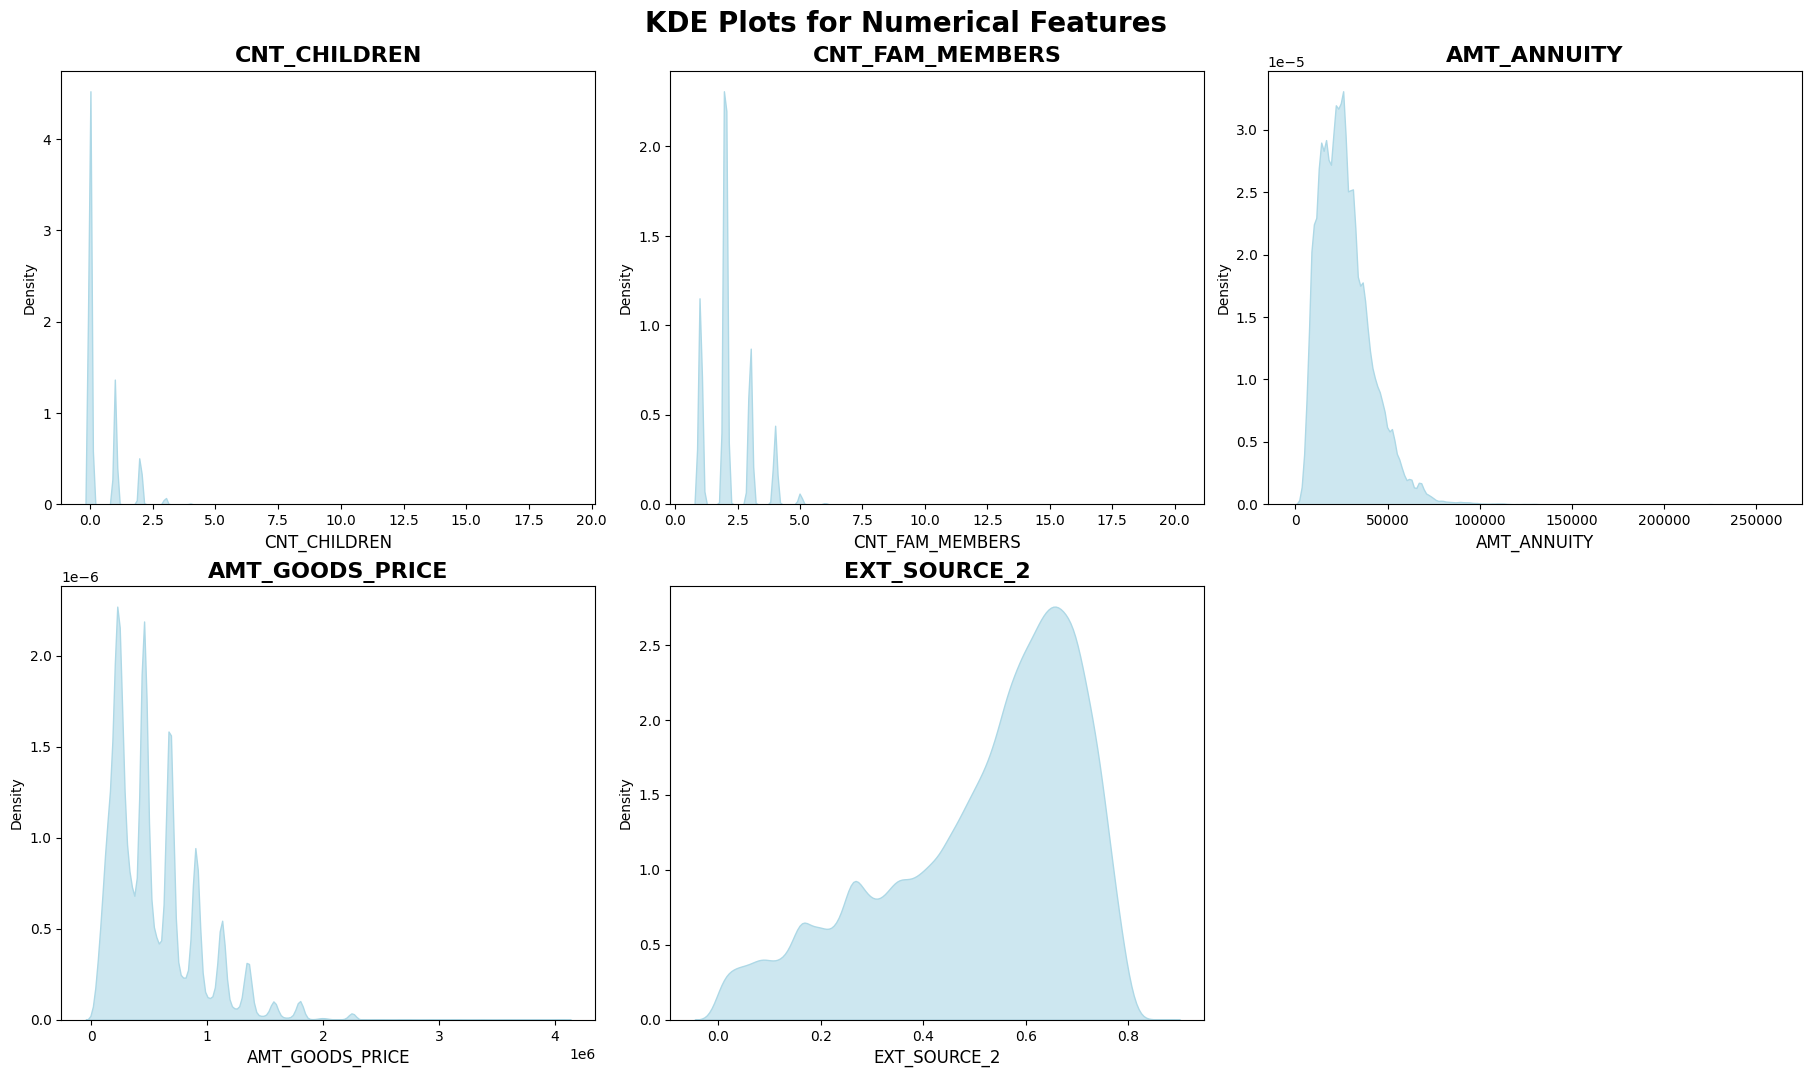

In [13]:
num_rows = (len(selected_num_features) + 1) // 2
fig, axes = plt.subplots(num_rows, 3, figsize=(18, 5 * num_rows), constrained_layout=True)
fig.suptitle("KDE Plots for Numerical Features", fontsize=20, fontweight='bold')
axes = axes.flatten()
for i, col in enumerate(selected_num_features):
    sns.kdeplot(data=new_train_app_df, x=col, ax=axes[i], fill=True, color="lightblue", alpha=0.6)
    axes[i].set_title(f"{col}", fontsize=16, fontweight='bold')
    axes[i].set_xlabel(col, fontsize=12)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.show()

### Detect Outliers with IQR method

In [14]:
# Detect outliers using IQR method
Q1 = new_train_app_df[selected_num_features].quantile(0.25)
Q3 = new_train_app_df[selected_num_features].quantile(0.75)
IQR = Q3 - Q1

outliers_IQR = ((new_train_app_df[selected_num_features] < (Q1 - 1.5 * IQR)) | (new_train_app_df[selected_num_features] > (Q3 + 1.5 * IQR)))

outliers_count_IQR = outliers_IQR.sum()

outliers_percentage = (outliers_count_IQR / new_train_app_df.shape[0]) * 100

#num_desc_stats = new_train_app_df[selected_num_features].describe().transpose()
num_desc_stats = pd.DataFrame()

# Add additional statistics
num_desc_stats['outlier_count'] = outliers_count_IQR
num_desc_stats['outliers (%)'] = outliers_percentage

num_desc_stats

,outlier_count,outliers (%)
CNT_CHILDREN,4272,1.389259
CNT_FAM_MEMBERS,4007,1.303081
AMT_ANNUITY,7504,2.440309
AMT_GOODS_PRICE,14728,4.789562
EXT_SOURCE_2,0,0.000000


### Remove Outliers using winsorizing

In [15]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

for col in selected_num_features:
    new_train_app_df[col] = np.where(new_train_app_df[col] < lower_bound[col], lower_bound[col], new_train_app_df[col])
    new_train_app_df[col] = np.where(new_train_app_df[col] > upper_bound[col], upper_bound[col], new_train_app_df[col])

outliers_IQR = ((new_train_app_df[selected_num_features] < (Q1 - 1.5 * IQR)) | (new_train_app_df[selected_num_features] > (Q3 + 1.5 * IQR)))
outliers_count_IQR = outliers_IQR.sum()
outliers_percentage = (outliers_count_IQR / new_train_app_df.shape[0]) * 100
# Check the results
winsorized_desc_stats = new_train_app_df[selected_num_features].describe().transpose()
# Add outlier information to the statistics
winsorized_desc_stats['outlier_count'] = outliers_count_IQR
winsorized_desc_stats['outliers (%)'] = outliers_percentage

winsorized_desc_stats[['outlier_count', 'outliers (%)']]

,outlier_count,outliers (%)
CNT_CHILDREN,0,0.0
CNT_FAM_MEMBERS,0,0.0
AMT_ANNUITY,0,0.0
AMT_GOODS_PRICE,0,0.0
EXT_SOURCE_2,0,0.0


### Plot categorical features distribution

C:\Users\fizuf\AppData\Local\Temp\ipykernel_12804\2557343684.py:23: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


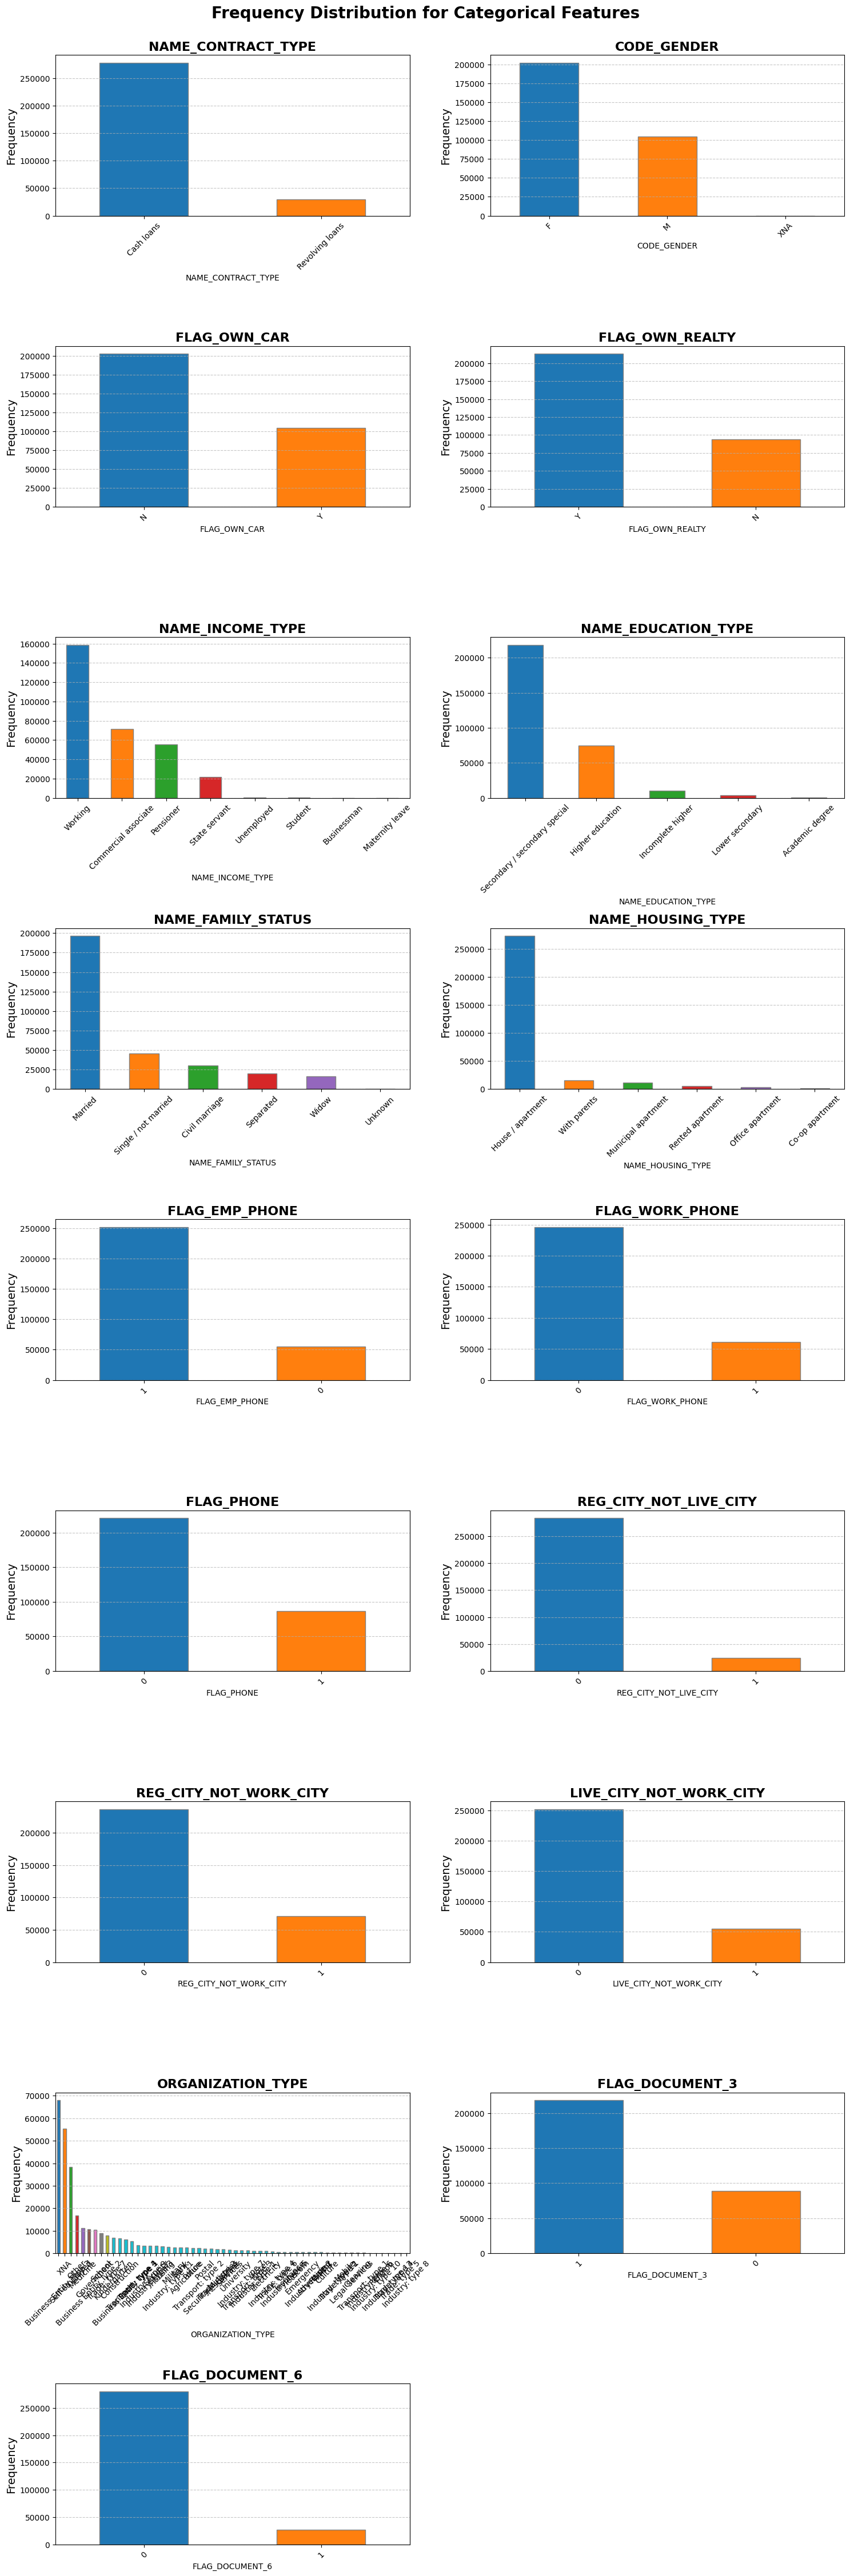

In [16]:
num_rows = (len(selected_cat_features) + 1) // 2
fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows), constrained_layout=True)

fig.suptitle("Frequency Distribution for Categorical Features", fontsize=20, fontweight='bold', y=1.001)

for i, column in enumerate(selected_cat_features):
    row, col = divmod(i, 2) 
    ax = axes[row, col]
    
    value_counts = new_train_app_df[column].value_counts()
    colors = plt.cm.tab10(range(len(value_counts)))
    
    value_counts.plot(kind="bar", ax=ax, color=colors, edgecolor="grey")
    
    ax.set_title(f"{column}", fontsize=16, fontweight='bold')
    ax.set_ylabel("Frequency", fontsize=14)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.tick_params(axis='x', labelrotation=45)

for j in range(len(selected_cat_features), num_rows * 2):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

### Handling High cardinality in Categorical Features Distribution

Training set

In [16]:
# handle 'XNA' gender -> replace with modus
new_train_app_df['CODE_GENDER'] = new_train_app_df['CODE_GENDER'].replace('XNA', 'F')

# handle underrepresented features (<50) -> group into 'Other'
rare_categories = new_train_app_df['NAME_INCOME_TYPE'].value_counts()[new_train_app_df['NAME_INCOME_TYPE'].value_counts() < 50].index
new_train_app_df['NAME_INCOME_TYPE'] = new_train_app_df['NAME_INCOME_TYPE'].replace(rare_categories, 'Other')

# handle underrespresented features (<5000) -> group into 'Other'
rare_categories = new_train_app_df['NAME_EDUCATION_TYPE'].value_counts()[new_train_app_df['NAME_EDUCATION_TYPE'].value_counts() < 5000].index
new_train_app_df['NAME_EDUCATION_TYPE'] = new_train_app_df['NAME_EDUCATION_TYPE'].replace(rare_categories, 'Other')

# drop 'Unknown' category since it only has 2 data
new_train_app_df = new_train_app_df[new_train_app_df['NAME_FAMILY_STATUS'] != 'Unknown']

# Context transformation to reduce dimension of the category
organization_type_mapping = {
    'Advertising': 'Service Industry',
    'Culture': 'Service Industry',
    'Cleaning': 'Service Industry',
    'Restaurant': 'Service Industry',
    'Bank': 'Financial/Telecom',
    'Insurance': 'Financial/Telecom',
    'Telecom': 'Financial/Telecom',
    'Business Entity Type 1': 'Business Entities',
    'Business Entity Type 2': 'Business Entities',
    'Business Entity Type 3': 'Business Entities',
    'Government': 'Public Sector',
    'Military': 'Public Sector',
    'Police': 'Public Sector',
    'Postal': 'Public Sector',
    'Self-employed': 'Private Sector',
    'School': 'Education',
    'Kindergarten': 'Education',
    'University': 'Education',
    'Transport: type 1': 'Transport',
    'Transport: type 2': 'Transport',
    'Transport: type 3': 'Transport',
    'XNA': 'Others'  # Handle any unspecified categories
}

new_train_app_df['ORGANIZATION_TYPE'] = new_train_app_df['ORGANIZATION_TYPE'].map(organization_type_mapping)

Testing set

In [17]:
# handle 'XNA' gender -> replace with modus

new_test_app_df['CODE_GENDER'] = new_test_app_df['CODE_GENDER'].replace('XNA', 'F')

# handle underrepresented features (<50) -> group into 'Other'
rare_categories = new_test_app_df['NAME_INCOME_TYPE'].value_counts()[new_test_app_df['NAME_INCOME_TYPE'].value_counts() < 50].index
new_test_app_df['NAME_INCOME_TYPE'] = new_test_app_df['NAME_INCOME_TYPE'].replace(rare_categories, 'Other')

# handle underrespresented features (<5000) -> group into 'Other'
rare_categories = new_test_app_df['NAME_EDUCATION_TYPE'].value_counts()[new_test_app_df['NAME_EDUCATION_TYPE'].value_counts() < 5000].index
new_test_app_df['NAME_EDUCATION_TYPE'] = new_test_app_df['NAME_EDUCATION_TYPE'].replace(rare_categories, 'Other')

# drop 'Unknown' category since it only has 2 data
new_test_app_df = new_test_app_df[new_test_app_df['NAME_FAMILY_STATUS'] != 'Unknown']

# Context transformation to reduce dimension of the category
organization_type_mapping = {
    'Advertising': 'Service Industry',
    'Culture': 'Service Industry',
    'Cleaning': 'Service Industry',
    'Restaurant': 'Service Industry',
    'Bank': 'Financial/Telecom',
    'Insurance': 'Financial/Telecom',
    'Telecom': 'Financial/Telecom',
    'Business Entity Type 1': 'Business Entities',
    'Business Entity Type 2': 'Business Entities',
    'Business Entity Type 3': 'Business Entities',
    'Government': 'Public Sector',
    'Military': 'Public Sector',
    'Police': 'Public Sector',
    'Postal': 'Public Sector',
    'Self-employed': 'Private Sector',
    'School': 'Education',
    'Kindergarten': 'Education',
    'University': 'Education',
    'Transport: type 1': 'Transport',
    'Transport: type 2': 'Transport',
    'Transport: type 3': 'Transport',
    'XNA': 'Others'  # Handle any unspecified categories
}

new_test_app_df['ORGANIZATION_TYPE'] = new_test_app_df['ORGANIZATION_TYPE'].map(organization_type_mapping)

C:\Users\fizuf\AppData\Local\Temp\ipykernel_18556\2894804412.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_test_app_df['CODE_GENDER'] = new_test_app_df['CODE_GENDER'].replace('XNA', 'F')
C:\Users\fizuf\AppData\Local\Temp\ipykernel_18556\2894804412.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_test_app_df['NAME_INCOME_TYPE'] = new_test_app_df['NAME_INCOME_TYPE'].replace(rare_categories, 'Other')
C:\Users\fizuf\AppData\Local\Temp\ipykernel_18556\2894804412.py:11: SettingWithCopyWarning: 
A

### Plot categorical features distribution

C:\Users\fizuf\AppData\Local\Temp\ipykernel_12804\3472521964.py:29: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


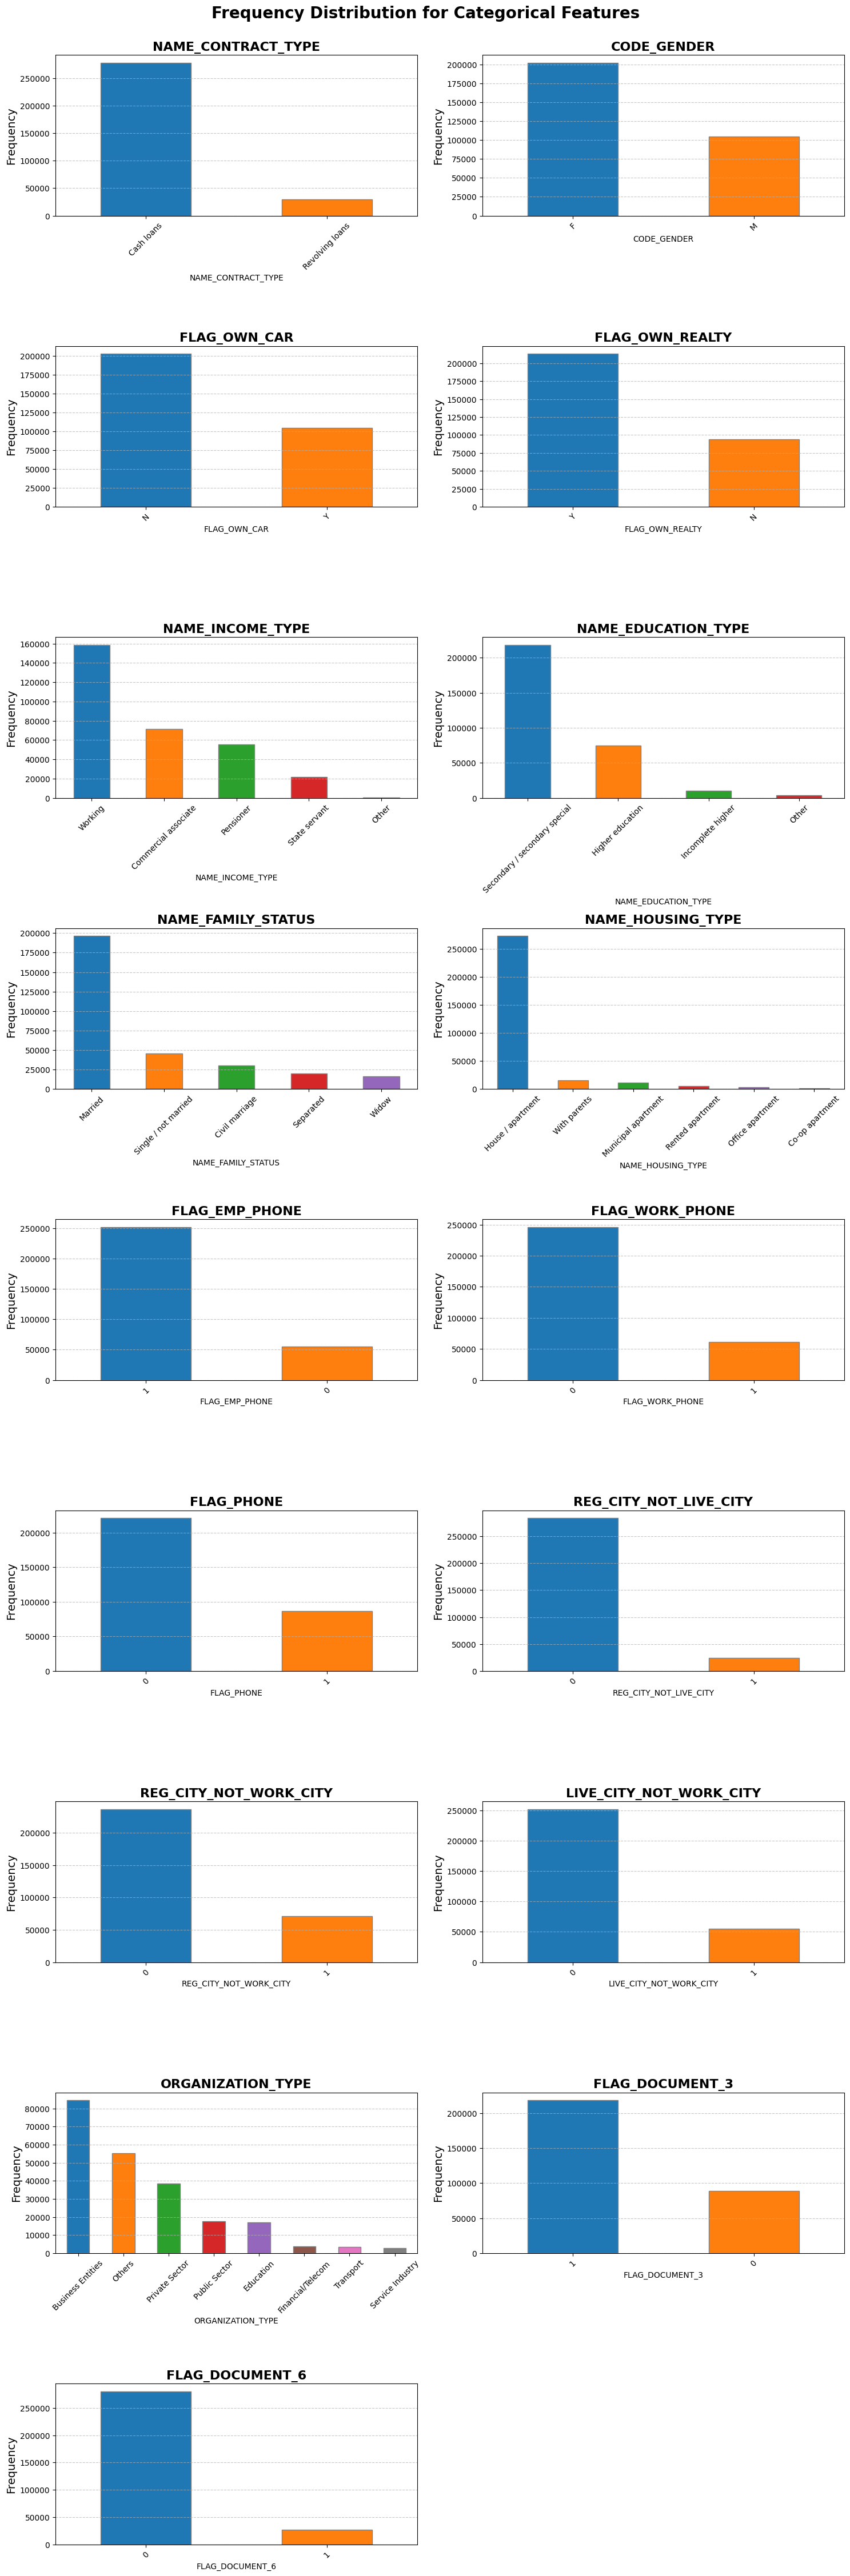

In [19]:
num_rows = (len(selected_cat_features) + 1) // 2
fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows), constrained_layout=True)

fig.suptitle("Frequency Distribution for Categorical Features", fontsize=20, fontweight='bold', y=1.001)

# Flatten the axes array to avoid errors with multidimensional indexing
axes = axes.flatten()

for i, column in enumerate(selected_cat_features):
    ax = axes[i]
    
    # Calculate the value counts for each category
    value_counts = new_train_app_df[column].value_counts()
    
    # Plot a bar chart with the value counts
    colors = plt.cm.tab10(range(len(value_counts)))
    value_counts.plot(kind="bar", ax=ax, color=colors, edgecolor="grey")
    
    # Customize the plot appearance
    ax.set_title(f"{column}", fontsize=16, fontweight='bold')
    ax.set_ylabel("Frequency", fontsize=14)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.tick_params(axis='x', labelrotation=45)

# Remove unused axes if there are any
for j in range(len(selected_cat_features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


## 🔨Feature transformation

### Feature Encoding for Categorical Features

Binary Label Encoding

In [18]:
# Trainig set
new_train_app_df['NAME_CONTRACT_TYPE'] = new_train_app_df['NAME_CONTRACT_TYPE'].map({'Cash loans': 0, 'Revolving loans': 1})
new_train_app_df['CODE_GENDER'] = new_train_app_df['CODE_GENDER'].map({'F': 0, 'M': 1})
new_train_app_df['FLAG_OWN_CAR'] = new_train_app_df['FLAG_OWN_CAR'].map({'N': 0, 'Y': 1})
new_train_app_df['FLAG_OWN_REALTY'] = new_train_app_df['FLAG_OWN_REALTY'].map({'N': 0, 'Y': 1})

# Testing set
new_test_app_df['NAME_CONTRACT_TYPE'] = new_test_app_df['NAME_CONTRACT_TYPE'].map({'Cash loans': 0, 'Revolving loans': 1})
new_test_app_df['CODE_GENDER'] = new_test_app_df['CODE_GENDER'].map({'F': 0, 'M': 1})
new_test_app_df['FLAG_OWN_CAR'] = new_test_app_df['FLAG_OWN_CAR'].map({'N': 0, 'Y': 1})
new_test_app_df['FLAG_OWN_REALTY'] = new_test_app_df['FLAG_OWN_REALTY'].map({'N': 0, 'Y': 1})

In [19]:
mode_gender = new_train_app_df['CODE_GENDER'].mode()[0]
new_train_app_df['CODE_GENDER'].fillna(mode_gender, inplace=True)
new_test_app_df['CODE_GENDER'].fillna(mode_gender, inplace=True)

new_train_app_df['CODE_GENDER'] = new_train_app_df['CODE_GENDER'].astype(int)
new_test_app_df['CODE_GENDER'] = new_test_app_df['CODE_GENDER'].astype(int)

One-hot Encoding

In [20]:
# Training set

one_hot_features = ['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'ORGANIZATION_TYPE']

one_hot_df = pd.get_dummies(
    new_train_app_df[one_hot_features], 
    prefix=one_hot_features,  # Add prefix to prevent name conflicts
    drop_first=True  # Drop one category to avoid multicollinearity
).astype(int)

# Combine with the original DataFrame (excluding original one-hot features)
new_train_app_df_encoded = pd.concat(
    [new_train_app_df.drop(columns=one_hot_features), one_hot_df], 
    axis=1
)


In [21]:
# Testing set

one_hot_df = pd.get_dummies(
    new_test_app_df[one_hot_features], 
    prefix=one_hot_features,
    drop_first=True 
).astype(int)

new_test_app_df_encoded = pd.concat(
    [new_test_app_df.drop(columns=one_hot_features), one_hot_df], 
    axis=1
)

Split the dataset before further standardization and scaling

In [22]:
from sklearn.model_selection import train_test_split

X = new_train_app_df_encoded.drop(columns=['TARGET'], axis=1)
y = new_train_app_df_encoded['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Log transformation for skewed features

In [23]:
transformed_num_features = ['AMT_ANNUITY_log', 'AMT_GOODS_PRICE_log', 'EXT_SOURCE_2_log']

new_train_app_df['AMT_ANNUITY_log'] = np.log(new_train_app_df['AMT_ANNUITY'] + 1)  # Log-transform with p=1
new_train_app_df['AMT_GOODS_PRICE_log'] = np.log(new_train_app_df['AMT_GOODS_PRICE'] + 1)
new_train_app_df['EXT_SOURCE_2_log'] = np.log(new_train_app_df['EXT_SOURCE_2'] + 1)

new_test_app_df['AMT_ANNUITY_log'] = np.log(new_test_app_df['AMT_ANNUITY'] + 1)  # Log-transform with p=1
new_test_app_df['AMT_GOODS_PRICE_log'] = np.log(new_test_app_df['AMT_GOODS_PRICE'] + 1)
new_test_app_df['EXT_SOURCE_2_log'] = np.log(new_test_app_df['EXT_SOURCE_2'] + 1)

X_train['AMT_ANNUITY_log'] = np.log(X_train['AMT_ANNUITY'] + 1)  # Log-transform with p=1
X_train['AMT_GOODS_PRICE_log'] = np.log(X_train['AMT_GOODS_PRICE'] + 1)
X_train['EXT_SOURCE_2_log'] = np.log(X_train['EXT_SOURCE_2'] + 1)

X_test['AMT_ANNUITY_log'] = np.log(X_test['AMT_ANNUITY'] + 1)  # Log-transform with p=1
X_test['AMT_GOODS_PRICE_log'] = np.log(X_test['AMT_GOODS_PRICE'] + 1)
X_test['EXT_SOURCE_2_log'] = np.log(X_test['EXT_SOURCE_2'] + 1)

### Plot Numerical features distribution

c:\Users\fizuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fizuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fizuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


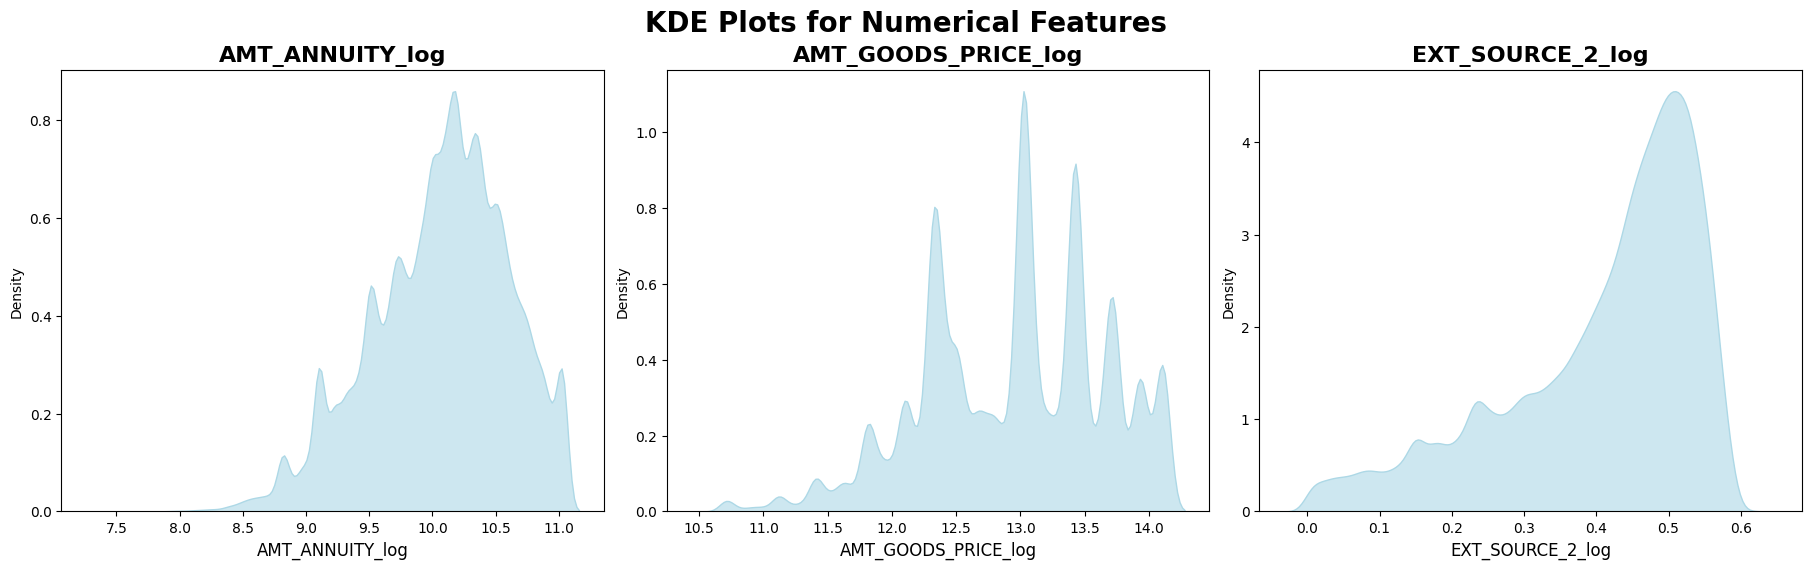

In [44]:
num_rows = (len(transformed_num_features) + 1) // 2
fig, axes = plt.subplots(num_rows, 3, figsize=(18, 5 * num_rows), constrained_layout=True)
fig.suptitle("KDE Plots for Numerical Features", fontsize=20, fontweight='bold')
axes = axes.flatten()
for i, col in enumerate(transformed_num_features):
    sns.kdeplot(data=new_train_app_df, x=col, ax=axes[i], fill=True, color="lightblue", alpha=0.6)
    axes[i].set_title(f"{col}", fontsize=16, fontweight='bold')
    axes[i].set_xlabel(col, fontsize=12)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.show()

### Min-Max Scaling

In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
new_train_app_df[['AMT_ANNUITY_log', 'AMT_GOODS_PRICE_log', 'EXT_SOURCE_2_log']] = scaler.fit_transform(new_train_app_df[['AMT_ANNUITY_log', 'AMT_GOODS_PRICE_log', 'EXT_SOURCE_2_log']])
new_test_app_df[['AMT_ANNUITY_log', 'AMT_GOODS_PRICE_log', 'EXT_SOURCE_2_log']] = scaler.transform(new_test_app_df[['AMT_ANNUITY_log', 'AMT_GOODS_PRICE_log', 'EXT_SOURCE_2_log']])

scaler2 = MinMaxScaler()
X_train[['AMT_ANNUITY_log', 'AMT_GOODS_PRICE_log', 'EXT_SOURCE_2_log']] = scaler2.fit_transform(X_train[['AMT_ANNUITY_log', 'AMT_GOODS_PRICE_log', 'EXT_SOURCE_2_log']])
X_test[['AMT_ANNUITY_log', 'AMT_GOODS_PRICE_log', 'EXT_SOURCE_2_log']] = scaler2.transform(X_test[['AMT_ANNUITY_log', 'AMT_GOODS_PRICE_log', 'EXT_SOURCE_2_log']])

### Plot numerical features distribution

c:\Users\fizuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fizuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fizuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


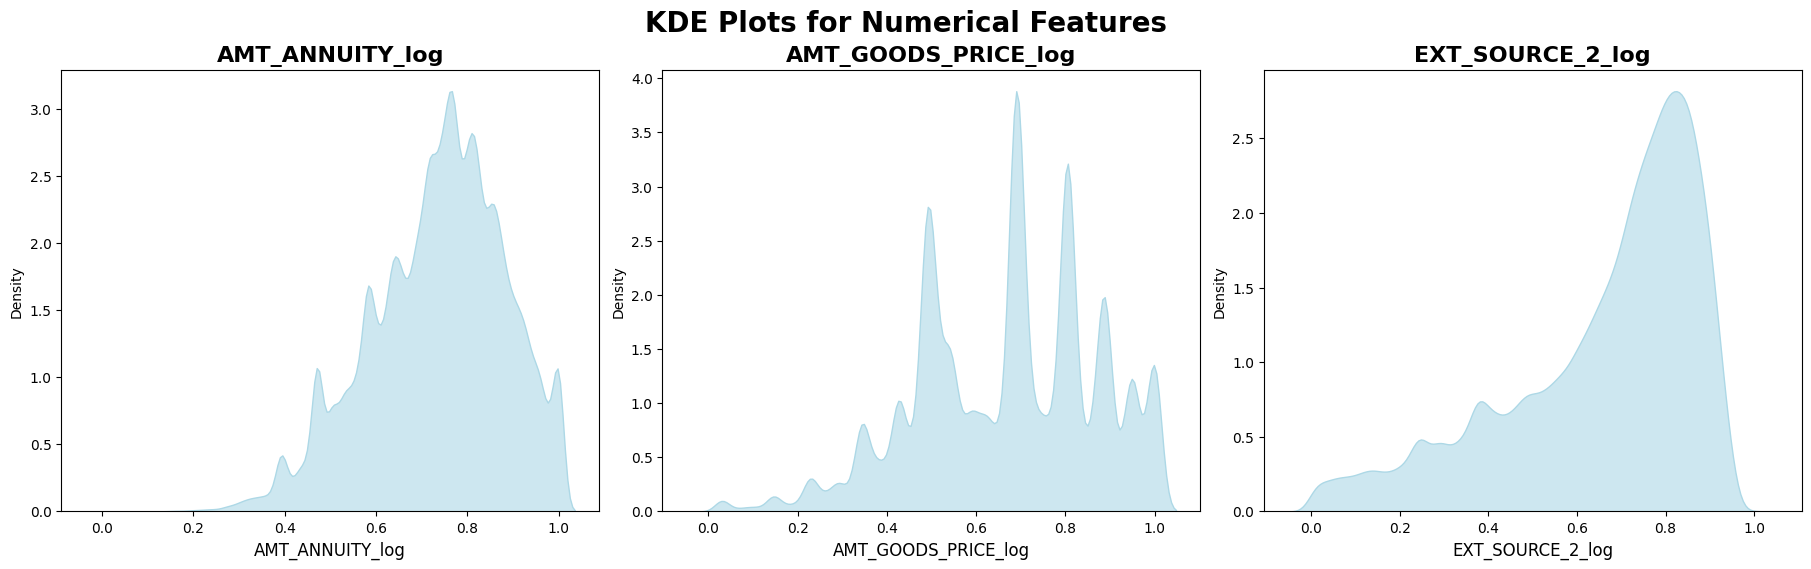

In [46]:
num_rows = (len(transformed_num_features) + 1) // 2
fig, axes = plt.subplots(num_rows, 3, figsize=(18, 5 * num_rows), constrained_layout=True)
fig.suptitle("KDE Plots for Numerical Features", fontsize=20, fontweight='bold')
axes = axes.flatten()
for i, col in enumerate(transformed_num_features):
    sns.kdeplot(data=new_train_app_df, x=col, ax=axes[i], fill=True, color="lightblue", alpha=0.6)
    axes[i].set_title(f"{col}", fontsize=16, fontweight='bold')
    axes[i].set_xlabel(col, fontsize=12)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.show()

In [26]:
# drop AMT_ANNUITY, AMT_GOODS_PRICE, AMT_SOURCE_2

drop_cols = ['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'EXT_SOURCE_2']

X_train = X_train.drop(columns=drop_cols, axis=1)
X_test = X_test.drop(columns=drop_cols, axis=1)

## Feature Engineering

Combine `CNT_FAM_MEMBERS` and `CNT_CHILDREN` into `CHILDREN_PER_FAMILY`

In [47]:
new_train_app_df_encoded['CHILDREN_PER_FAMILY'] = np.where(
    new_train_app_df_encoded['CNT_FAM_MEMBERS'] == 0,
    0,  # If CNT_FAM_MEMBERS is zero, set the result to 0
    new_train_app_df_encoded['CNT_CHILDREN'] / new_train_app_df_encoded['CNT_FAM_MEMBERS']
)
new_test_app_df_encoded['CHILDREN_PER_FAMILY'] = np.where(
    new_test_app_df_encoded['CNT_FAM_MEMBERS'] == 0,
    0,  # If CNT_FAM_MEMBERS is zero, set the result to 0
    new_test_app_df_encoded['CNT_CHILDREN'] / new_test_app_df_encoded['CNT_FAM_MEMBERS']
)


In [48]:
X_train['CHILDREN_PER_FAMILY'] = np.where(
    X_train['CNT_FAM_MEMBERS'] == 0,
    0,  # If CNT_FAM_MEMBERS is zero, set the result to 0
    X_train['CNT_CHILDREN'] / X_train['CNT_FAM_MEMBERS']
)
X_test['CHILDREN_PER_FAMILY'] = np.where(
    X_test['CNT_FAM_MEMBERS'] == 0,
    0,  # If CNT_FAM_MEMBERS is zero, set the result to 0
    X_test['CNT_CHILDREN'] / X_test['CNT_FAM_MEMBERS']
)

## 📊Handle Class Imbalance

### Apply SMOTE for over-sampling the minority class

In [49]:
X_training = new_train_app_df_encoded.drop(columns=['TARGET'])
y_training = new_train_app_df_encoded['TARGET']

In [28]:
from imblearn.over_sampling import SMOTE

# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X_training, y_training)

smote2 = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote2.fit_resample(X_train, y_train)


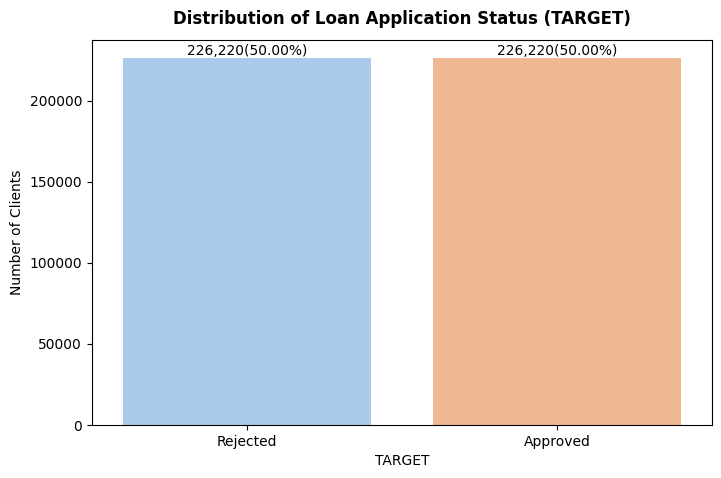

In [30]:
target_counts = y_train_resampled.value_counts()
target_percentage = y_train_resampled.value_counts(normalize=True) * 100

# Plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=target_counts.index, y=target_counts.values, palette='pastel')
plt.title('Distribution of Loan Application Status (TARGET)', fontsize=12, fontweight='bold', y=1.02)
plt.ylabel('Number of Clients')
plt.xticks([0, 1], ['Rejected', 'Approved'])

# Annotate the bars with counts and percentages
for i, (count, percentage) in enumerate(zip(target_counts, target_percentage)):
    ax.text(i, count + 500, f'{count:,}({percentage:.2f}%)', ha='center', va='bottom', fontsize=10)

plt.show()

In [52]:
app_df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), 
                                     pd.Series(y_resampled, name='TARGET')], axis=1)

## 📁Save into CSV files

In [35]:
len(X_train_resampled)

452440

In [34]:
len(X_test)

61500

In [36]:
# app_df_resampled.to_csv('preprocessed_train_app_df.csv', index=False)
# new_test_app_df_encoded.to_csv('preprocessed_test_app_df.csv', index=False)

X_train_resampled.to_csv('preprocessed_X_train.csv', index=False)
y_train_resampled.to_csv('preprocessed_y_train.csv', index=False)

X_test.to_csv('preprocessed_X_test.csv', index=False)
y_test.to_csv('preprocessed_y_test.csv', index=False)